#Ghazaleh Keyvani

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [8]:
import os
import shutil
from pathlib import Path

# Define the original directory and base directory
original_dir = Path("C:/Users/ww/Downloads/MR-uniesfahan/train_data")
base_dir = Path("C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small")

def create_subset(subset_name, category, start, end):
    # Create the directory for the subset
    subset_dir = base_dir / subset_name / category
    os.makedirs(subset_dir, exist_ok=True)
    
    for i in range(start, end):
        # Modify file naming pattern
        fname = f"{i}.jpg"
        src = original_dir / category / fname  # Source path considering "cat" or "dog"
        dst = subset_dir / fname  # Destination path
        
        # Check if the file exists before copying
        if os.path.exists(src):
            shutil.copy(src, dst)
        else:
            print(f"File not found: {src}")

# Create train, validation, and test sets for both categories
create_subset('train', 'cat', 0, 1000)
create_subset('train', 'dog', 0, 1000)
create_subset('validation', 'cat', 1000, 1500)
create_subset('validation', 'dog', 1000, 1500)
create_subset('test', 'cat', 1500, 2000)
create_subset('test', 'dog', 1500, 2000)


In [35]:
from tensorflow.keras import models, layers

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(150, 150, 3)))
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:

import matplotlib.pyplot as plt

def plot_metrics(history):
    # دسترسی به تاریخچه آموزش مدل
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(loss) + 1)
    
    # رسم نمودار تابع هزینه
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color='blue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # رسم نمودار دقت
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy', color='blue')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [17]:
from PIL import Image
import os

def convert_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path).convert("RGB")  # Convert to RGB
                new_path = img_path.rsplit(".", 1)[0] + ".jpg"  # Save as .jpg
                img.save(new_path, "JPEG")
            except Exception as e:
                print(f"Error converting file: {file}, error: {e}")

# Convert train and validation directories
print(convert_images("C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small/train"))
print(convert_images("C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small/validation"))


None
None


In [10]:
train = "C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small/train"
validation = "C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small/validation"


In [54]:
print("Train directory:", train)
print("Validation directory:", validation)

Train directory: C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small/train
Validation directory: C:/Users/ww/Downloads/MR-uniesfahan/cats_vs_dogs_small/validation


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Subset for training
)

validation_generator = train_datagen.flow_from_directory(
    validation,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Subset for validation
)


Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [55]:
print("Train directory:", train_generator)
print("Validation directory:", validation_generator)

Train directory: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x000001EAC3263DF0>
Validation directory: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x000001EAC3263880>


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6199 - loss: 0.6436 - val_accuracy: 0.6100 - val_loss: 0.6798
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 878ms/step - accuracy: 0.7047 - loss: 0.5627 - val_accuracy: 0.6600 - val_loss: 0.6438
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 869ms/step - accuracy: 0.7648 - loss: 0.5037 - val_accuracy: 0.6350 - val_loss: 0.7236
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 914ms/step - accuracy: 0.7965 - loss: 0.4296 - val_accuracy: 0.6350 - val_loss: 0.7468
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 906ms/step - accuracy: 0.8191 - loss: 0.3874 - val_accuracy: 0.6100 - val_loss: 0.7831
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 909ms/step - accuracy: 0.8624 - loss: 0.3130 - val_accuracy: 0.6350 - val_loss: 0.7559
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 931ms/step - accuracy: 0.8858 - loss: 0.2904 - val_accuracy: 0.6300 - val_loss: 0.9440
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 983ms/step - accuracy: 0.9225 - loss: 0.1975 - val_accurac

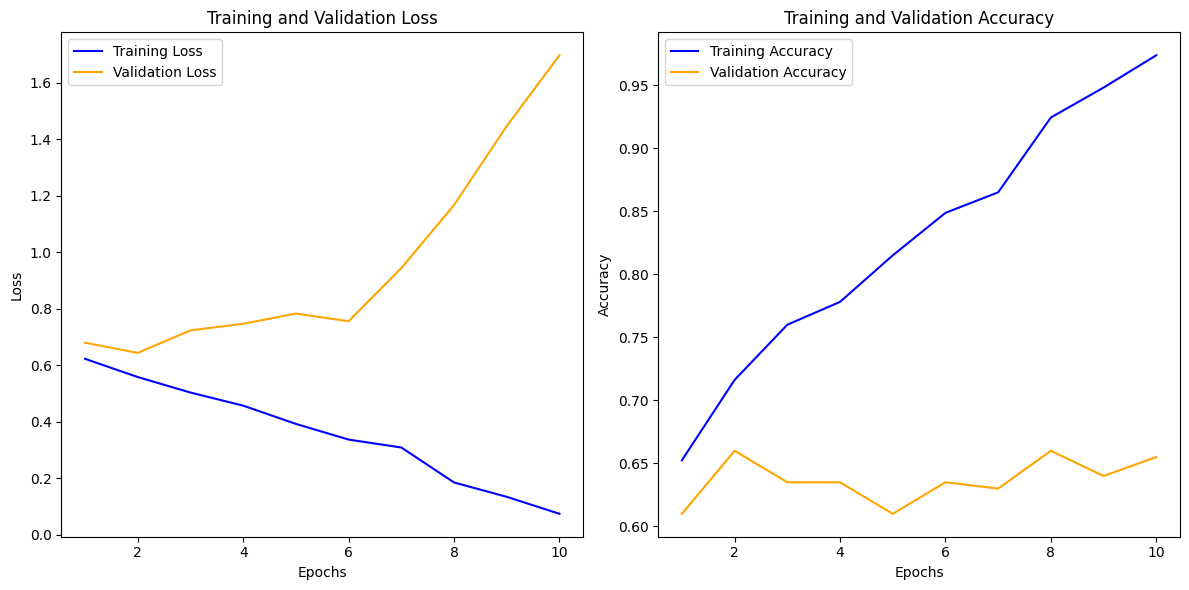

In [59]:
try:
    history = cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator)
    plot_metrics(history)
except Exception as e:
    print(f"Error during training: {e}")


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 618ms/step - accuracy: 0.5361 - loss: 5.7387 - val_accuracy: 0.4900 - val_loss: 1.7981
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 557ms/step - accuracy: 0.5139 - loss: 1.9438 - val_accuracy: 0.5650 - val_loss: 0.7653
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 578ms/step - accuracy: 0.5635 - loss: 0.9188 - val_accuracy: 0.5700 - val_loss: 0.7728
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 626ms/step - accuracy: 0.5994 - loss: 0.7798 - val_accuracy: 0.5600 - val_loss: 0.7323
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 598ms/step - accuracy: 0.6002 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 1.3726
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 546ms/step - accuracy: 0.6295 - loss: 0.7248 - val_accuracy: 0.5800 - val_loss: 0.7358
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 543ms/step - accuracy: 0.5958 - loss: 0.7763 - val_accuracy: 0.5000 - val_loss: 0.8415
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 545ms/step - accuracy: 0.6493 - loss: 0.6310 - val_accu

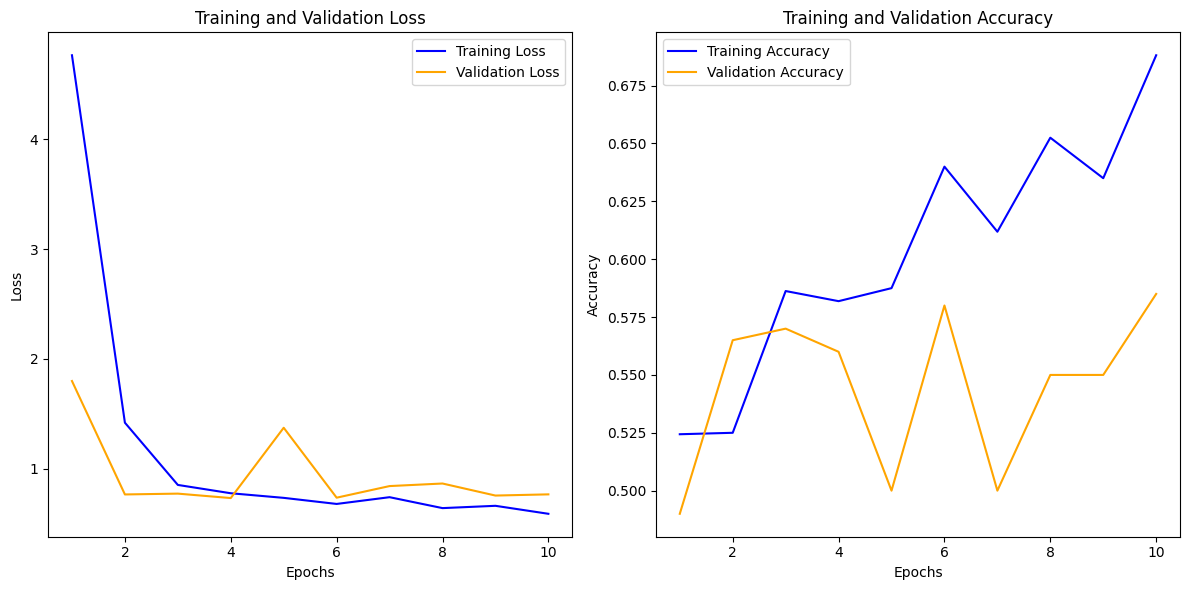

In [60]:
try:
    history = mlp_model.fit(train_generator, epochs=10, validation_data=validation_generator)
    plot_metrics(history)
except Exception as e:
    print(f"Error during training: {e}")




## **1. مدل CNN (Convolutional Neural Network)**


### **پارامترهای قابل آزمایش:**
| پارامتر | مقادیر تست شده | تأثیر احتمالی |
|---------|------------------------|--------------|
| **تعداد لایه‌های کانولوشن** | 2, 3, 4 | افزایش لایه‌ها دقت را بهبود می‌دهد، اما ممکن است باعث Overfitting شود. |
| **تعداد فیلترها** | 32, 64, 128, 256 | فیلترهای بیشتر، ویژگی‌های پیچیده‌تر را تشخیص می‌دهند. |
| **اندازه کرنل** | (3×3), (5×5) | کرنل‌های بزرگ‌تر، الگوهای بزرگ‌تر را تشخیص می‌دهند. |
| **لایه‌های Pooling** | MaxPooling(2×2), AvgPooling | MaxPooling معمولاً بهتر عمل می‌کند. |
| **لایه‌های Dropout** | 0.2, 0.5 | کاهش Overfitting با غیرفعال کردن نورون‌ها. |
| **تعداد نورون‌های Dense** | 128, 256, 512 | نورون‌های بیشتر، مدل را پیچیده‌تر می‌کنند. |
| **تابع فعال‌ساز** | ReLU, LeakyReLU | ReLU معمولاً بهتر است، اما LeakyReLU از "مرگ نورون‌ها" جلوگیری می‌کند. |
| **بهینه‌ساز (Optimizer)** | Adam, SGD, RMSprop | Adam معمولاً بهترین عملکرد را دارد. |
| **نرخ یادگیری (Learning Rate)** | 0.001, 0.0001 | نرخ یادگیری کوچک‌تر، همگرایی بهتری دارد اما کندتر است. |

### **بررسی Overfitting:**
- **رسم نمودار Loss و Accuracy** برای داده‌های آموزش و اعتبارسنجی:
  - اگر **Loss آموزش کاهش یابد ولی Loss اعتبارسنجی ثابت/افزایش یابد** → **Overfitting**.
- **راه‌حل‌ها**:
  - افزودن **Dropout** (مثلاً `layers.Dropout(0.5)` بعد از لایه‌های Dense).
  - استفاده از **Augmentation** (چرخش، تغییر اندازه، فلیپ افقی/عمودی).
  - کاهش پیچیدگی مدل (کاهش لایه‌ها یا نورون‌ها).

---

## **2. مدل MLP (Multi-Layer Perceptron)**

### **پارامترهای قابل آزمایش:**
| پارامتر | مقادیر تست شده | تأثیر احتمالی |
|---------|------------------------|--------------|
| **تعداد لایه‌های Dense** | 1, 2, 3 | لایه‌های بیشتر، مدل را پیچیده‌تر می‌کند. |
| **تعداد نورون‌ها** | 128, 256, 512, 1024 | نورون‌های بیشتر، قدرت مدل را افزایش می‌دهند. |
| **تابع فعال‌ساز** | ReLU, Sigmoid, Tanh | ReLU برای لایه‌های پنهان بهتر است. |
| **Dropout** | 0.2, 0.5 | کاهش Overfitting. |
| **بهینه‌ساز** | Adam, SGD | Adam معمولاً بهتر است. |

### **مقایسه CNN و MLP:**
- **CNN** برای پردازش تصاویر بسیار بهتر است چون **الگوهای مکانی** (مانند لبه‌ها، بافت‌ها) را تشخیص می‌دهد.
- **MLP** عملکرد ضعیف‌تری دارد چون **ساختار مکانی تصاویر را نادیده می‌گیرد** (فقط پیکسل‌ها را به صورت یک بردار پردازش می‌کند).

---

## **3. آزمایش‌های پیشنهادی**
### **الف) آزمایش CNN**
1. **مدل ساده (بدون Dropout و Augmentation)**:
   - بررسی Overfitting با مقایسه `train_loss` و `val_loss`.
2. **مدل با Dropout**:
   - اضافه کردن `Dropout(0.5)` بعد از لایه‌های Dense.
3. **مدل با Augmentation**:
   - استفاده از `ImageDataGenerator` برای افزایش داده‌ها:


### **ب) آزمایش MLP**
1. **مدل با یک لایه پنهان (512 نورون)**:
   - بررسی دقت پایه.
2. **مدل با دو لایه پنهان (512 و 256 نورون)**:
   - آیا عمق بیشتر کمک می‌کند؟
3. **مدل با Dropout**:
   - آیا Dropout(0.3) از Overfitting جلوگیری می‌کند؟

---

## **4. تحلیل نتایج**
- **رسم نمودارهای Loss و Accuracy** برای هر مدل:

- **اگر Validation Loss افزایش یابد** → **Overfitting**.
- **اگر هر دو Loss بالا باشند** → **Underfitting** (نیاز به مدل قوی‌تر).

---

## **جمع‌بندی**
- **CNN** برای این مسئله مناسب‌تر است.
- **پارامترهای کلیدی**: تعداد لایه‌های کانولوشن، فیلترها، Dropout، Augmentation.
- **بررسی Overfitting**: با مقایسه `train_loss` و `val_loss`.
- **بهبود مدل**: اگر Overfitting دارید، از **Dropout** و **Augmentation** استفاده کنید. اگر Underfitting دارید، مدل را **پیچیده‌تر** کنید.


In [12]:
from tensorflow.keras import models, layers, optimizers

mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(150, 150, 3)))
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.BatchNormalization())  # بهبود همگرایی
mlp_model.add(layers.Dropout(0.5))  # کاهش Overfitting
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.BatchNormalization())
mlp_model.add(layers.Dropout(0.3))
mlp_model.add(layers.Dense(1, activation='sigmoid'))

# بهینه‌ساز با نرخ یادگیری تنظیم‌شده
optimizer = optimizers.Adam(learning_rate=0.0001)
mlp_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# بهینه‌ساز با تنظیمات پیشرفته
optimizer = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # چرخش تصادفی
    width_shift_range=0.2,  # جابجایی افقی
    height_shift_range=0.2, # جابجایی عمودی
    shear_range=0.2,        # تغییر شکل
    zoom_range=0.2,         # زوم تصادفی
    horizontal_flip=True,   # فلیپ افقی
    fill_mode='nearest'     # پر کردن پیکسل‌های خالی
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 847ms/step - accuracy: 0.5473 - loss: 0.8837 - val_accuracy: 0.5350 - val_loss: 0.7930
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 601ms/step - accuracy: 0.5766 - loss: 0.8012 - val_accuracy: 0.5100 - val_loss: 1.0373
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 695ms/step - accuracy: 0.5985 - loss: 0.7445 - val_accuracy: 0.5500 - val_loss: 0.8365
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 666ms/step - accuracy: 0.6265 - loss: 0.7366 - val_accuracy: 0.5750 - val_loss: 0.7123
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 578ms/step - accuracy: 0.6623 - loss: 0.6436 - val_accuracy: 0.5650 - val_loss: 0.7240


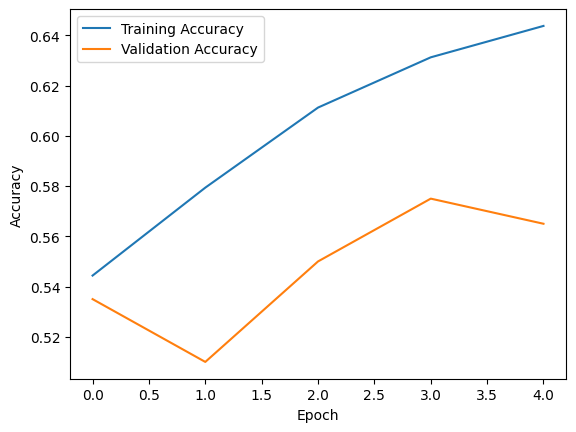

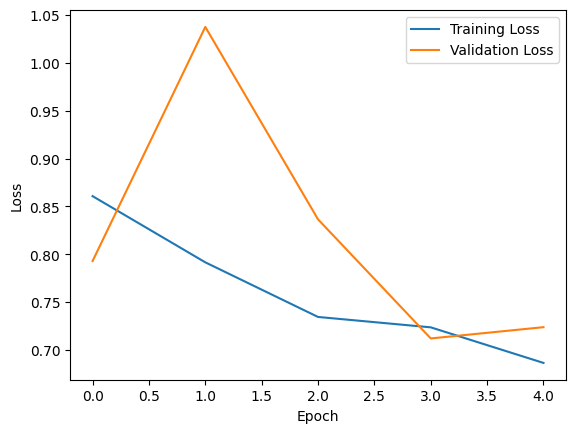

In [18]:
try:
    history = mlp_model.fit(train_generator, epochs=5, validation_data=validation_generator)
    plot_metrics(history)
except Exception as e:
    print(f"Error during training: {e}")


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7283 - loss: 0.6484 - val_accuracy: 0.5000 - val_loss: 1.6950
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8720 - loss: 0.3024 - val_accuracy: 0.5000 - val_loss: 3.6490
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9269 - loss: 0.1928 - val_accuracy: 0.5000 - val_loss: 3.4458
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9536 - loss: 0.1271 - val_accuracy: 0.5000 - val_loss: 4.1855
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9747 - loss: 0.0819 - val_accuracy: 0.5000 - val_loss: 4.4021


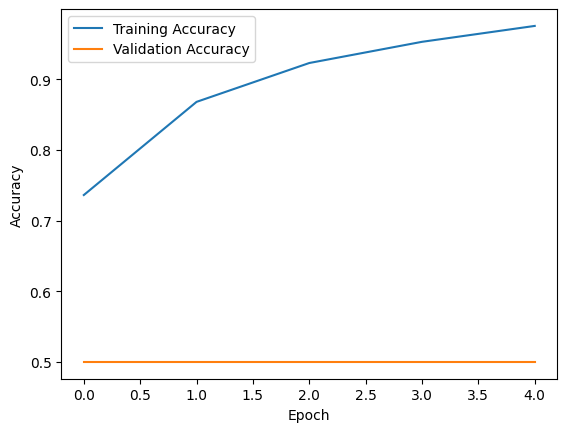

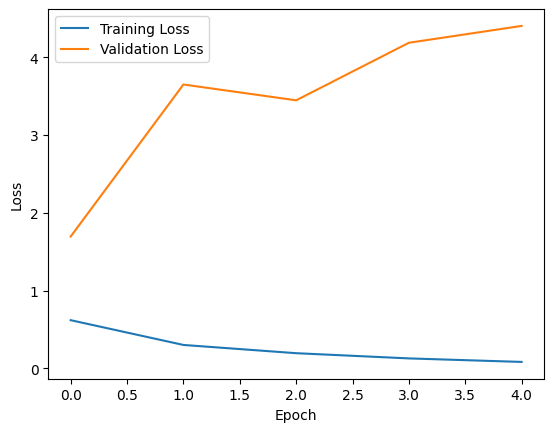

In [19]:
try:
    history = cnn_model.fit(train_generator, epochs=5, validation_data=validation_generator)
    plot_metrics(history)
except Exception as e:
    print(f"Error during training: {e}")


مدل MLP:

مناسب برای داده‌های ساده، اما برای تصاویر عملکرد ضعیف‌تری دارد.

مقادیر بهینه: Dropout=0.3-0.5, Learning Rate=0.0001, BatchNorm.

مدل CNN:

بهترین انتخاب برای پردازش تصاویر.

مقادیر بهینه: فیلترهای افزایشی, Dropout=0.5, BatchNorm, Augmentation.